In [220]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [221]:
# def I3(m, n):
#     """Calculates the influence coefficient function."""
#     return 1 / (4 * np.pi) * (((2 * m * n * (m**2 + n**2 + 1)**0.5) / (m**2 + n**2 + (m**2)*(n**2) + 1)) * ((m**2 + n**2 + 2) / (m**2 + n**2 + 1)) + np.arctan((2 * m * n * (m**2 + n**2 + 1)**0.5) / (m**2 + n**2 - (m**2)*(n**2) + 1)))

In [222]:
# Optimized I3
def I3(m, n):
    """Calculates the influence coefficient function with optimizations."""

    # Common sub-expressions
    m2_plus_n2 = m**2 + n**2
    m2_plus_n2_plus_1 = m2_plus_n2 + 1
    m2_times_n2 = m**2 * n**2

    # Simplified expression
    return 1 / (4 * np.pi) * (
        (2 * m * n * np.sqrt(m2_plus_n2_plus_1) / (m2_plus_n2 + m2_times_n2 + 1))
        * ((m2_plus_n2 + 2) / m2_plus_n2_plus_1)
        + np.arctan((2 * m * n * np.sqrt(m2_plus_n2_plus_1) / (m2_plus_n2 - m2_times_n2 + 1)))
    )

In [223]:
# Define parameters
q = 10000 # point load applied to the surface of a rectangular region (N/m²)
L = 100 # Length of the rectangular region (m)
B = 70 # Breadth (or width) of the rectangular region (m)
Z = 20 # Depth (meter)
S = 1 # Step (meter)

# Initialize arrays
A = np.zeros((int(B / S) + 1, int(L / S) + 1, int(Z / S) + 1))

In [224]:
# Calculate settlement or stress distribution
for dZ in range(1, Z + 1, S):
    for dB in range(1, int(B / S) + 1, S):
        for dL in range(1, int(L / S) + 1, S):
            m1 = (B / 2 + dB) / dZ
            n1 = (L / 2 - dL) / dZ
            P1 = q * I3(m1, n1)

            m2 = (B / 2 - dB) / dZ
            n2 = (L / 2 - dL) / dZ
            P2 = q * I3(m2, n2)

            m3 = (B / 2 - dB) / dZ
            n3 = (L / 2 + dL) / dZ
            P3 = q * I3(m3, n3)

            m4 = (B / 2 + dB) / dZ
            n4 = (L / 2 + dL) / dZ
            P4 = q * I3(m4, n4)

            P = P1 + P2 + P3 + P4
            A[dB, dL, dZ] = q * P

            # Additional cases for other regions
            if dL >= L / 2:
                m1 = (B / 2 + dB) / dZ
                n1 = (L + dL) / dZ
                P1 = q * I3(m1, n1)

                m2 = (B / 2 - dB) / dZ
                n2 = (L + dL) / dZ
                P2 = q * I3(m2, n2)

                m3 = (B / 2 + dB) / dZ
                n3 = (dL) / dZ
                P3 = q * I3(m3, n3)

                m4 = (B / 2 - dB) / dZ
                n4 = (dL) / dZ
                P4 = q * I3(m4, n4)

                P = (P1 + P2) - (P3 + P4)
                A[dB, min(dL + 50, int(L / S)), dZ] = q * P

            if dB >= B / 2:
                m1 = (B + dB) / dZ
                n1 = (L / 2 + dL) / dZ
                P1 = q * I3(m1, n1)

                m2 = (B + dB) / dZ
                n2 = (L / 2 - dL) / dZ
                P2 = q * I3(m2, n2)

                m3 = (dB) / dZ
                n3 = (L / 2 + dL) / dZ
                P3 = q * I3(m3, n3)

                m4 = (dB) / dZ
                n4 = (L / 2 - dL) / dZ
                P4 = q * I3(m4, n4)

                P = (P1 + P2) - (P3 + P4)
                A[min(dB + 50, int(B / S)), dL, dZ] = q * P

            if dB >= B / 2 and dL >= L / 2:
                m1 = (B + dB) / dZ
                n1 = (L + dL) / dZ
                P1 = q * I3(m1, n1)

                m2 = (B + dB) / dZ
                n2 = (dL) / dZ
                P2 = q * I3(m2, n2)

                m3 = (dB) / dZ
                n3 = (L + dL) / dZ
                P3 = q * I3(m3, n3)

                m4 = (dB) / dZ
                n4 = (dL) / dZ
                P4 = q * I3(m4, n4)

                P = P1 - (P2 + P3) + P4
                A[min(dB + 50, int(B / S)), min(dL + 50, int(L / S)), dZ] = q * P

In [225]:
# Create a 3D grid
X, Y, Z = np.meshgrid(np.arange(0, B + S, S), np.arange(0, L + S, S), np.arange(0, Z + S, S))

# Select a specific Z-slice (adjust index as needed)
Z_slice = 10

# Check array dimensions
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")
print(f"Shape of A: {A.shape}")

# Reshape X and Y to match the first dimension of A
X = X.reshape(-1, A.shape[1], A.shape[2])
Y = Y.reshape(-1, A.shape[1], A.shape[2])

Shape of X: (101, 71, 21)
Shape of Y: (101, 71, 21)
Shape of A: (71, 101, 21)


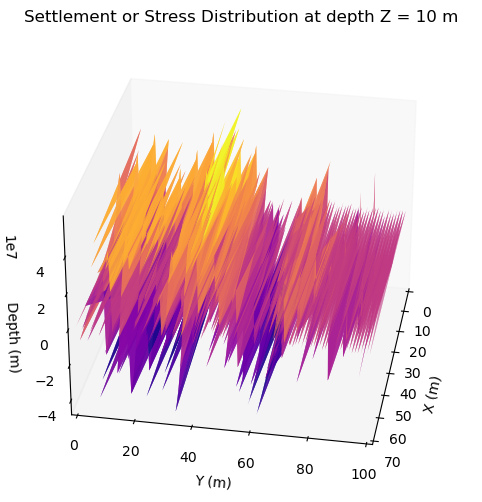

In [226]:
# Visualize the selected slice
'''
3D plot represents how the deflection or stress varies across the length (X-axis),
 breadth (Y-axis), and depth (Z-axis) of the rectangular region.
'''
# Create a 3D plot
fig = plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
ax = fig.add_subplot(111, projection='3d')

# Customize the plot surface
ax.plot_surface(X[:, :, Z_slice], Y[:, :, Z_slice], A[:, :, Z_slice], 
                cmap='plasma',  # Change the colormap (e.g., 'plasma', 'coolwarm')
                alpha=0.8,      # Adjust transparency
                linewidth=0.2)   # Set the line width of surface edges

# Customize the axes
ax.set_xlabel('X (m)') 
ax.set_ylabel('Y (m)')
ax.set_zlabel('Depth (m)') 
ax.set_xlim(X.min(), X.max())  # Set axis limits for better scaling (optional)
ax.set_ylim(Y.min(), Y.max())  # Set axis limits for better scaling (optional)
ax.set_zlim(A.min(), A.max())  # Set axis limits for better scaling (optional)
ax.grid(False)  # Remove gridlines for cleaner visualization (optional)

# Add a title and change the view angle
plt.title(f'Settlement or Stress Distribution at depth Z = {Z_slice} m')
ax.view_init(elev=30, azim=10)  # Adjust elevation and azimuth for a different view

plt.show()

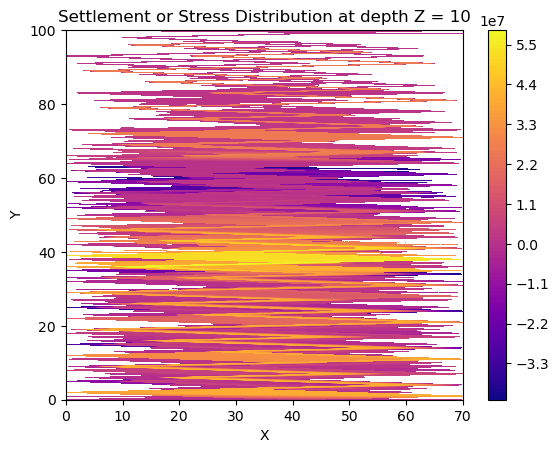

In [227]:
# Visualize the selected slice
plt.contourf(X[:, :, Z_slice], Y[:, :, Z_slice], A[:, :, Z_slice], levels=100, cmap='plasma')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Settlement or Stress Distribution at depth Z = {Z_slice}')
plt.colorbar()
plt.show()

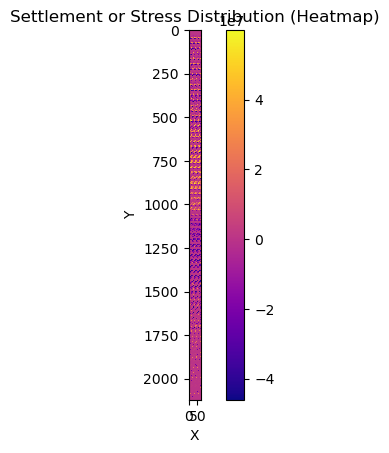

In [228]:
# Reshape A into a 2D heatmap
A_heatmap = A.reshape(-1, int(B / S) + 1)

# Visualize the heatmap
plt.imshow(A_heatmap, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Settlement or Stress Distribution (Heatmap)')
plt.show()